# Evaluation

## IoU: Intersection over union  
<img src="./IoU.png"> 

In [1]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [2]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [4]:
GT = pd.read_csv('./CarDark.csv',header=None)
GT.head()

,0,1,2,3
0,73,126,29,23
1,73,125,29,23
2,74,125,29,24
3,75,125,29,24
4,75,125,30,24


In [5]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,73,126,102,149
1,73,125,102,148
2,74,125,103,149
3,75,125,104,149
4,75,125,105,149


In [6]:
csrt = pd.read_csv('./results/csrt.csv')
kcf = pd.read_csv('./results/kcf.csv')
boosting = pd.read_csv('./results/boosting.csv')
mil = pd.read_csv('./results/MIL.csv')
tld = pd.read_csv('./results/TLD.csv')
mf = pd.read_csv('./results/medianflow.csv')

In [7]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(393):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [8]:
miou = []
Rob = []

In [9]:
precision=[]
recall = []

### KCF Tracker

In [10]:
IoU_kcf = []
ol_kcf = []
count_kcf = 0
IoU_kcf,ol_kcf, count_kcf = evaluate(kcf)
time = [int(v) for v in range(393)]

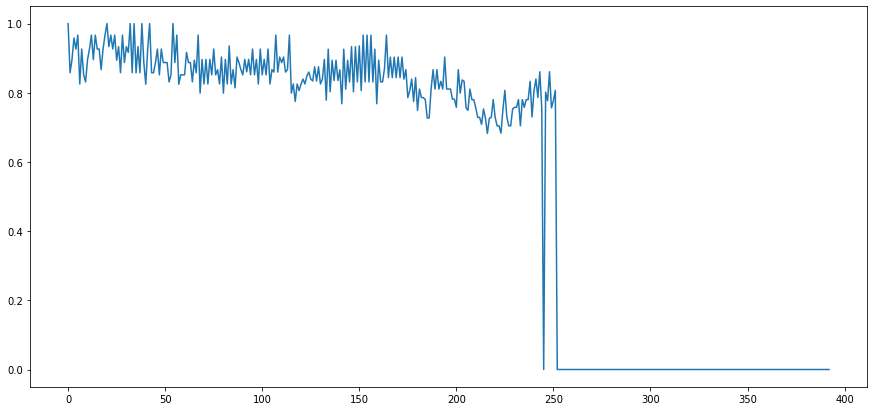

In [11]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_kcf)
plt.show()

Robustness：VOTで使用される評価指標。追従中に overlap が0になってしまったときを追従失敗とみなし、1つの動画シーケンスに対して何回追従失敗するか。

In [12]:
rob = count_kcf / len(gt)
Rob.append(rob)
print('Robustness：',rob)
mIoU = sum(IoU_kcf) / len(gt)
miou.append(mIoU)
print('mIoU:',mIoU)

Robustness： 0.361323155216285
mIoU: 0.5433238734119115


In [13]:
print(count_kcf)

142


In [14]:
TP = []
FP = []
for i in range(393):
    if IoU_kcf[i] > 0.5:
        TP.append(IoU_kcf[i])
    
    elif IoU_kcf[i] < 0.5:
        FP.append(IoU_kcf[i])     
        
Recall = len(TP) / (393)
print('Recall：',Recall)
Precision = len(TP) / (393-count_kcf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.638676844783715
Precision： 1.0


In [15]:
pre_kcf = []

In [16]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_kcf[i] > j:
            TP.append(IoU_kcf[i])
        elif IoU_kcf[i] < j:
            FP.append(IoU_kcf[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_kcf))*100
    print('Precision：', Precision)
    pre_kcf.append(Precision)

Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.638676844783715
Precision： 100.0
Recall： 0.6335877862595419
Precision： 99.20318725099602
Recall： 0.4961832061068702
Precision： 77.68924302788844
Recall： 0.15012722646310434
Precision： 23.50597609561753
Recall： 0.0
Precision： 0.0


### CSRT Tracker

In [17]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(393)]

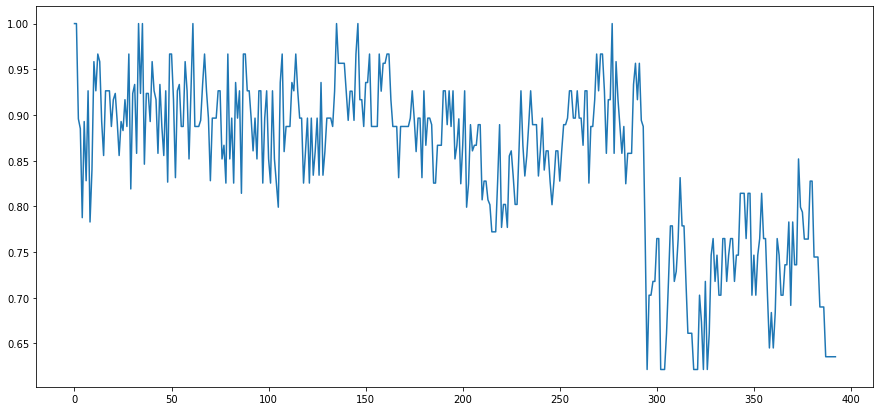

In [18]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_csrt)
plt.show()

In [19]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.8494687251765612


In [20]:
TP = []
FP = []
for i in range(393):
    if IoU_csrt[i] > 0.5:
        TP.append(IoU_csrt[i])
    
    elif IoU_csrt[i] < 0.5:
        FP.append(IoU_csrt[i])     
        
Recall = len(TP) / (393)
print('Recall：',Recall)
Precision = len(TP) / (393-count_csrt)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 1.0
Precision： 1.0


In [21]:
pre_csrt = []

In [22]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_csrt[i] > j:
            TP.append(IoU_csrt[i])
        elif IoU_csrt[i] < j:
            FP.append(IoU_csrt[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_csrt))*100
    print('Precision：', Precision)
    pre_csrt.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.926208651399491
Precision： 92.6208651399491
Recall： 0.7506361323155216
Precision： 75.06361323155217
Recall： 0.27989821882951654
Precision： 27.989821882951656
Recall： 0.0
Precision： 0.0


### Boosting Tracker

In [23]:
IoU_b = []
ol_b = []
count_b = 0
IoU_b,ol_b, count_b = evaluate(boosting)

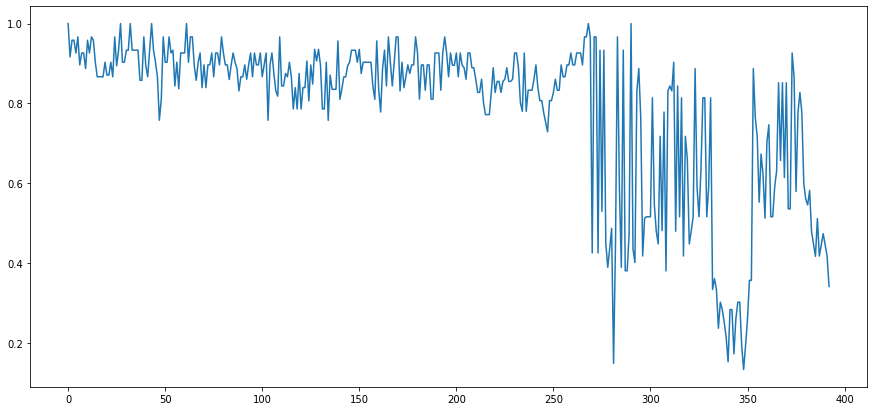

In [24]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_b)
plt.show()

In [25]:
rob = count_b / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_b) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.7839712675746161


In [26]:
TP = []
FP = []
for i in range(393):
    if IoU_b[i] > 0.5:
        TP.append(IoU_b[i])
    
    elif IoU_b[i] < 0.5:
        FP.append(IoU_b[i])     
        
Recall = len(TP) / (393)
print('Recall：',Recall)
Precision = len(TP) / (393-count_b)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.8651399491094147
Precision： 0.8651399491094147


In [27]:
pre_b = []

In [28]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_b[i] > j:
            TP.append(IoU_b[i])
        elif IoU_b[i] < j:
            FP.append(IoU_b[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_b))*100
    print('Precision：', Precision)
    pre_b.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9847328244274809
Precision： 98.47328244274809
Recall： 0.9643765903307888
Precision： 96.43765903307889
Recall： 0.9287531806615776
Precision： 92.87531806615776
Recall： 0.8651399491094147
Precision： 86.51399491094148
Recall： 0.7989821882951654
Precision： 79.89821882951654
Recall： 0.7811704834605598
Precision： 78.11704834605598
Recall： 0.712468193384224
Precision： 71.2468193384224
Recall： 0.3053435114503817
Precision： 30.53435114503817
Recall： 0.0
Precision： 0.0


### Median flow Tracker

In [29]:
IoU_mf = []
ol_mf = []
count_mf = 0
IoU_mf,ol_mf, count_mf = evaluate(mf)

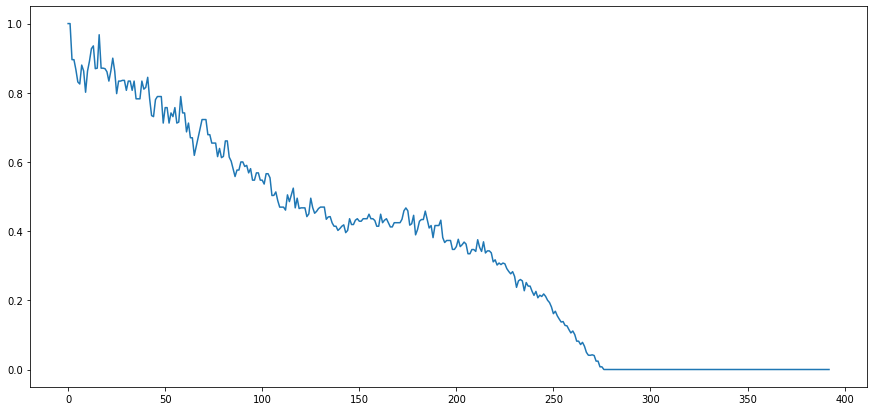

In [30]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mf)
plt.show()

In [31]:
rob = count_mf / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mf) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.29770992366412213
mIoU: 0.34548944011378


In [32]:
TP = []
FP = []
for i in range(393):
    if IoU_mf[i] > 0.5:
        TP.append(IoU_mf[i])
    
    elif IoU_mf[i] < 0.5:
        FP.append(IoU_mf[i])     
        
Recall = len(TP) / (393)
print('Recall：',Recall)
Precision = len(TP) / (393-count_mf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.2824427480916031
Precision： 0.40217391304347827


In [33]:
pre_mf = []

In [35]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_mf[i] > j:
            TP.append(IoU_mf[i])
        elif IoU_mf[i] < j:
            FP.append(IoU_mf[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_mf))*100
    print('Precision：', Precision)
    pre_mf.append(Precision)

Recall： 0.7022900763358778
Precision： 100.0
Recall： 0.6666666666666666
Precision： 94.92753623188406
Recall： 0.6310432569974554
Precision： 89.85507246376811
Recall： 0.5750636132315522
Precision： 81.88405797101449
Recall： 0.48346055979643765
Precision： 68.84057971014492
Recall： 0.2824427480916031
Precision： 40.21739130434783
Recall： 0.22137404580152673
Precision： 31.521739130434785
Recall： 0.16539440203562342
Precision： 23.55072463768116
Recall： 0.09669211195928754
Precision： 13.768115942028986
Recall： 0.01272264631043257
Precision： 1.8115942028985508
Recall： 0.0
Precision： 0.0


### MIL Tracker

In [36]:
IoU_mil = []
ol_mil = []
count_mil = 0
IoU_mil,ol_mil, count_mil = evaluate(mil)

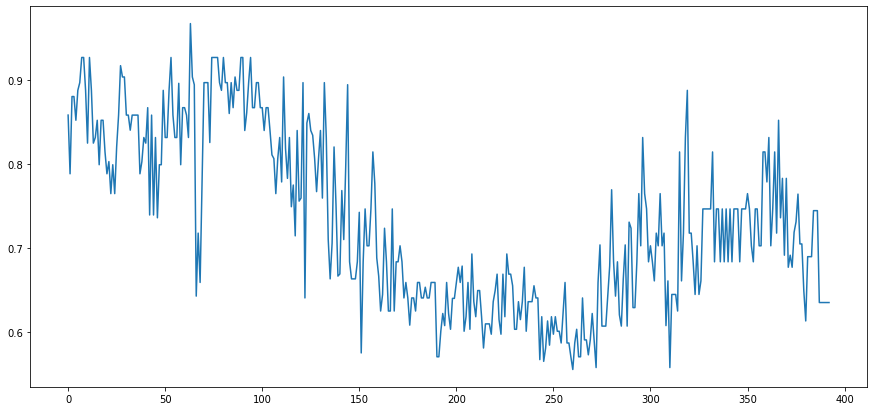

In [37]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mil)
plt.show()

In [38]:
rob = count_mil / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mil) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.7321807811885086


In [39]:
TP = []
FP = []
for i in range(393):
    if IoU_mil[i] > 0.5:
        TP.append(IoU_mil[i])
    
    elif IoU_mil[i] < 0.5:
        FP.append(IoU_mil[i])     
        
Recall = len(TP) / (393)
print('Recall：',Recall)
Precision = len(TP) / (393-count_mil)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 1.0
Precision： 1.0


In [40]:
pre_mil = []

In [41]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_mil[i] > j:
            TP.append(IoU_mil[i])
        elif IoU_mil[i] < j:
            FP.append(IoU_mil[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_mil))*100
    print('Precision：', Precision)
    pre_mil.append(Precision)

Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 1.0
Precision： 100.0
Recall： 0.9338422391857506
Precision： 93.38422391857506
Recall： 0.549618320610687
Precision： 54.961832061068705
Recall： 0.30279898218829515
Precision： 30.279898218829516
Recall： 0.04834605597964377
Precision： 4.8346055979643765
Recall： 0.0
Precision： 0.0


### TLD Tracker 

In [42]:
IoU_tld = []
ol_tld = []
count_tld = 0
IoU_tld,ol_tld, count_tld = evaluate(tld)

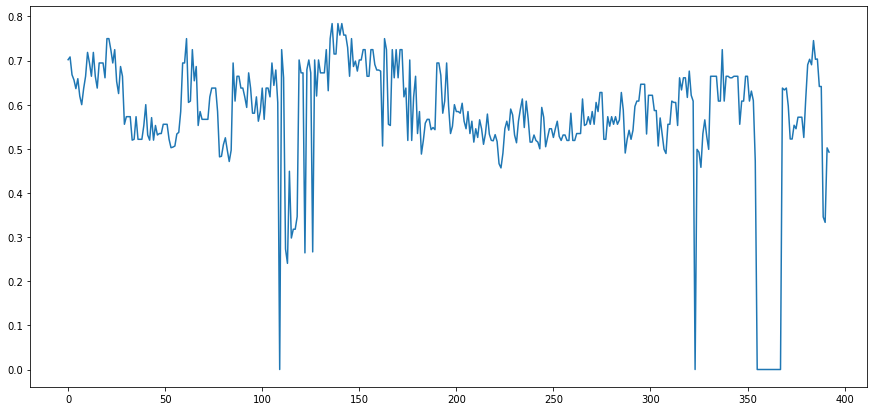

In [43]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_tld)
plt.show()

In [44]:
rob = count_tld / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_tld) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.03816793893129771
mIoU: 0.5731021844931231


In [45]:
TP = []
FP = []
FN = []
for i in range(393):
    if IoU_tld[i] > 0.5:
        TP.append(IoU_tld[i])
    
    elif IoU_tld[i] < 0.5 and IoU_tld[i] > 0:
        FP.append(IoU_tld[i])     
    
    elif IoU_tld[i] == 0:
        FN.append(IoU_tld[i])
        
Recall = len(TP) / (len(TP)+len(FN))
print('Recall：',Recall)
Precision = len(TP) / (393-count_tld)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.9586776859504132
Precision： 0.9206349206349206


In [46]:
pre_tld = []

In [47]:
th = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in th:
    TP = []
    FP = []
    for i in range(393):
        if IoU_tld[i] > j:
            TP.append(IoU_tld[i])
        elif IoU_tld[i] < j:
            FP.append(IoU_tld[i])     
    Recall = len(TP) / (393)
    print('Recall：',Recall)
    Precision = (len(TP) / (393-count_tld))*100
    print('Precision：', Precision)
    pre_tld.append(Precision)

Recall： 0.9618320610687023
Precision： 100.0
Recall： 0.9618320610687023
Precision： 100.0
Recall： 0.9618320610687023
Precision： 100.0
Recall： 0.9491094147582697
Precision： 98.67724867724867
Recall： 0.9363867684478372
Precision： 97.35449735449735
Recall： 0.8854961832061069
Precision： 92.06349206349206
Recall： 0.46564885496183206
Precision： 48.41269841269841
Recall： 0.11450381679389313
Precision： 11.904761904761903
Recall： 0.0
Precision： 0.0
Recall： 0.0
Precision： 0.0
Recall： 0.0
Precision： 0.0


## Result

In [48]:
tracker = ['kcf','csrt','boosting','medianflow','mil','tld']
result = pd.DataFrame()
result = result.assign(Tracker=tracker)
result = result.assign(Robustness = Rob)
result = result.assign(mIoU = miou)
result = result.assign(Recall = recall)
result = result.assign(Precision= precision)
result = result[['Tracker','mIoU', 'Robustness','Recall','Precision']]
result

,Tracker,mIoU,Robustness,Recall,Precision
0,kcf,0.543324,0.361323,0.638677,1.000000
1,csrt,0.849469,0.000000,1.000000,1.000000
2,boosting,0.783971,0.000000,0.865140,0.865140
3,medianflow,0.345489,0.297710,0.282443,0.402174
4,mil,0.732181,0.000000,1.000000,1.000000
5,tld,0.573102,0.038168,0.958678,0.920635


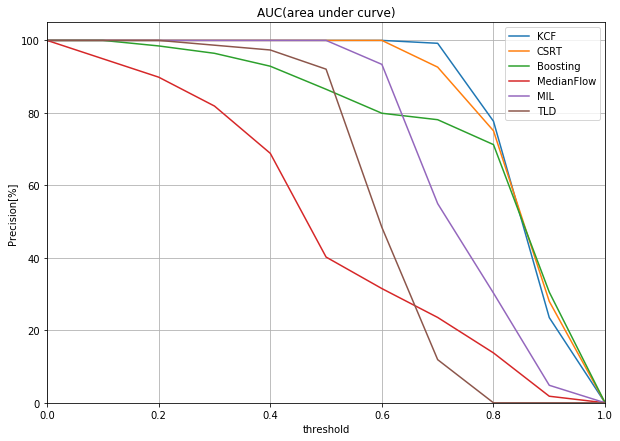

In [50]:
plt.figure(figsize=(10,7))
p1 = plt.plot(th, pre_kcf, antialiased=True)
p2 = plt.plot(th, pre_csrt, antialiased=True)
p3 = plt.plot(th, pre_b, antialiased=True)
p4 = plt.plot(th, pre_mf, antialiased=True)
p5 = plt.plot(th, pre_mil, antialiased=True)
p6 = plt.plot(th, pre_tld, antialiased=True)
plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]), ("KCF","CSRT","Boosting","MedianFlow","MIL","TLD"))
plt.grid()
plt.xlim(0.0, 1.0)
plt.ylim(0, 105)
plt.title('AUC(area under curve)')
plt.xlabel('threshold')
plt.ylabel('Precision[%]')
plt.show()